# QuantArt

## Clone Repo

In [ ]:
!git clone https://github.com/codebyrpp/QuantArt.git

## Setup Conda Environment

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

In [ ]:
!conda init bash
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')

In [ ]:
%%bash
cd /content/QuantArt/
conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main
conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r
conda env create -f environment.yaml -y

## Download Pretrained Models

Download pre-trained [landscape2art](https://drive.google.com/drive/folders/1uTNhiLRzERKEYHGTlAEWhTOUvJDD3ibt) model and put it under logs/

In [ ]:
%%bash
gdown --folder https://drive.google.com/drive/folders/1uTNhiLRzERKEYHGTlAEWhTOUvJDD3ibt
mv /content/landscape2art/ /content/QuantArt/logs/

Retrieving folder 1mB_622PpKERfjb_HjfgHDaqd2Xds8mzU checkpoints
Processing file 1KrXtLoWAPQVfN3vNykNQFDP5ZrwEkYJy last.ckpt
Retrieving folder 1aXopqheflARLv_37VxJEL3dXzLCtyWH7 configs
Retrieving folder 1XDmfgfpj90Vin3tDb4EJ1nC4kb6lNQr8 .ipynb_checkpoints
Processing file 1GmClozteu48If4-12ro6duCK-7xhwopo test_paired.yaml
Processing file 170v2bwJALxEjyWYSNGp0vZJakxyMc_M9 test.yaml
Processing file 1QX__kqmf0tqlsMeQQWAC6u-5VvJf5UmK .DS_Store


Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1KrXtLoWAPQVfN3vNykNQFDP5ZrwEkYJy
From (redirected): https://drive.google.com/uc?id=1KrXtLoWAPQVfN3vNykNQFDP5ZrwEkYJy&confirm=t&uuid=492ad01d-7141-490a-a882-261329061785
To: /content/landscape2art/checkpoints/last.ckpt
100%|██████████| 534M/534M [00:06<00:00, 88.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GmClozteu48If4-12ro6duCK-7xhwopo
To: /content/landscape2art/configs/test_paired.yaml
100%|██████████| 1.58k/1.58k [00:00<00:00, 7.45MB/s]
Downloading...
From: https://drive.google.com/uc?id=170v2bwJALxEjyWYSNGp0vZJakxyMc_M9
To: /content/landscape2art/configs/test.yaml
100%|██████████| 1.87k/1.87k [00:00<00:00, 10.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QX__kqmf0tqlsMeQQWAC6u-5VvJf5UmK
To: /content/landscape2art/.DS_Store
100%|██████████| 6.15k/6.15k [00:00<0

## Setup required folders
Empty training dataset folders must also be created even for inference :)

In [ ]:
%%bash
cd /content/QuantArt/
mkdir -p datasets/lhq_1024_jpg
mkdir -p datasets/lhq_1024_jpg/lhq_1024_jpg
mkdir -p datasets/painter-by-numbers
touch datasets/painter-by-numbers/train_info.csv

## Initial Test

In [ ]:
%%bash
source activate quantart
cd /content/QuantArt
python -u main.py --base logs/landscape2art/configs/test_paired.yaml -n landscape2art --gpus 0, # trailing comma required


Running on GPUs 0,
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
VQLPIPSWithDiscriminator running with hinge loss.
Restored from logs/landscape2art/checkpoints/last.ckpt
accumulate_grad_batches = 1
Setting learning rate to 4.50e-06 = 1 (accumulate_grad_batches) * 1 (num_gpus) * 1 (batchsize) * 4.50e-06 (base_lr)
Testing 0 / 4
Testing 1 / 4
Testing 2 / 4
Testing 3 / 4


/usr/local/envs/quantart/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


## Visualize Results

Skipping /content/QuantArt/logs/.gitignore as it is not a directory.
No 'images' folder found in /content/QuantArt/logs/landscape2art
Displaying images for project: 2025-11-27T07-21-20_landscape2art


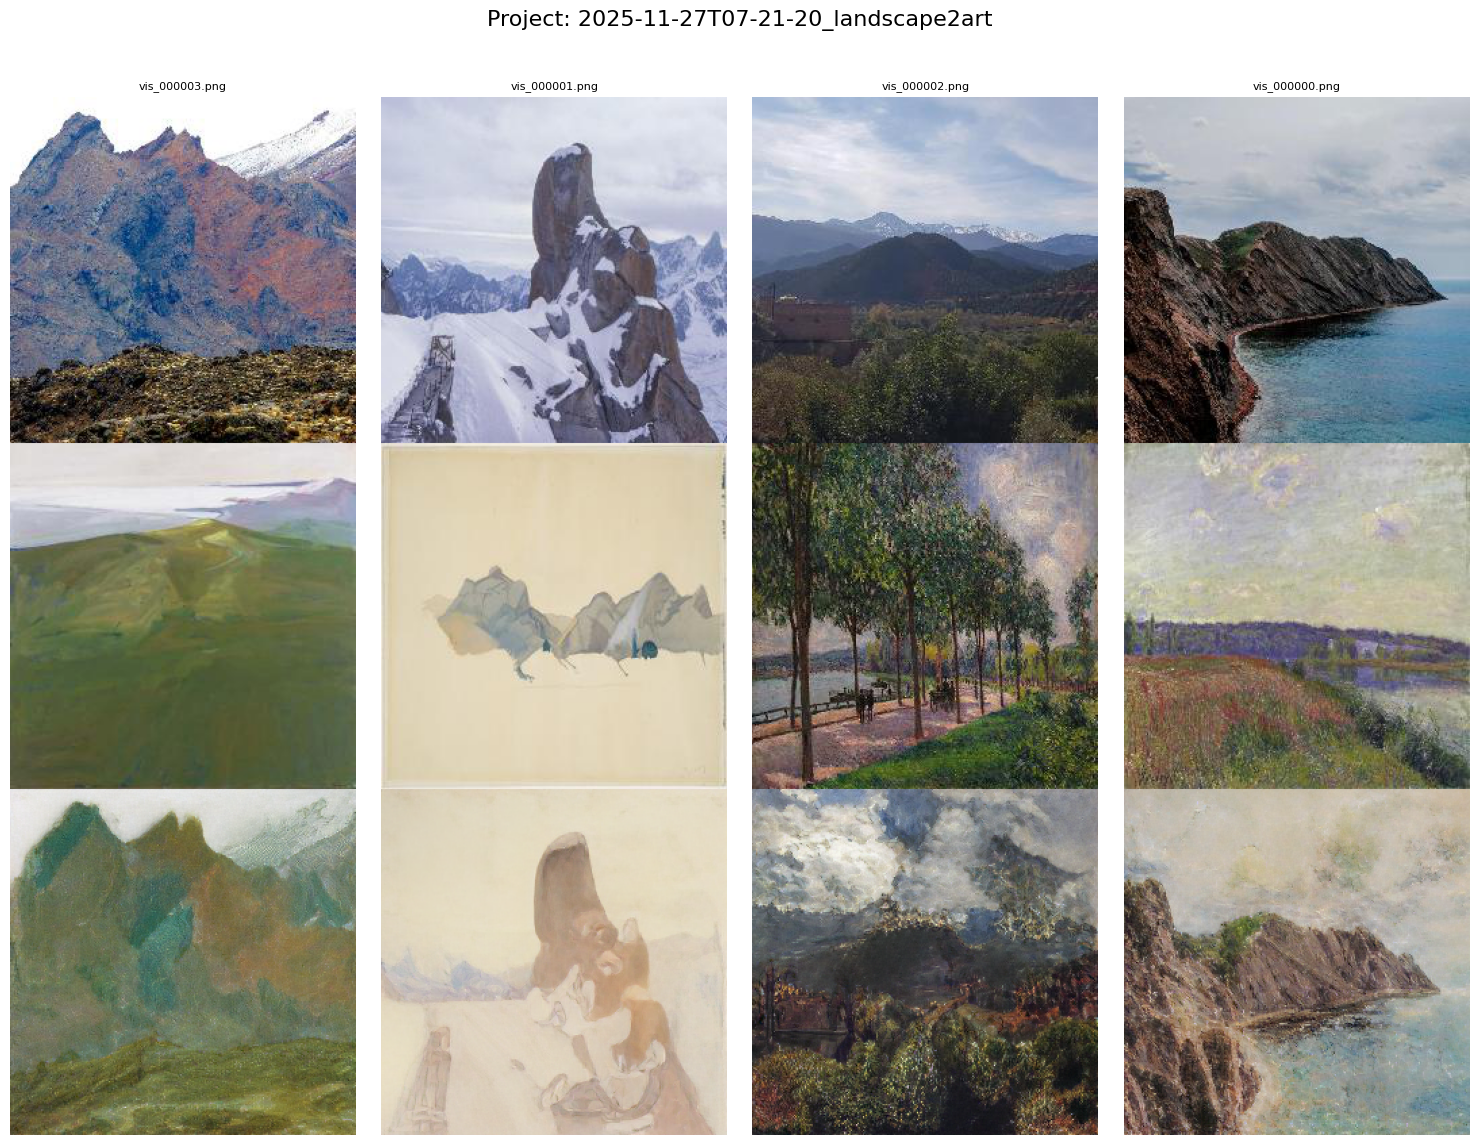

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

base_log_dir = '/content/QuantArt/logs/'

for project_dir in os.listdir(base_log_dir):
    full_project_path = os.path.join(base_log_dir, project_dir)

    if os.path.isdir(full_project_path):
        images_path = os.path.join(full_project_path, 'images/test')

        if os.path.isdir(images_path):
            image_files = glob.glob(os.path.join(images_path, '*.png')) + \
                          glob.glob(os.path.join(images_path, '*.jpg')) + \
                          glob.glob(os.path.join(images_path, '*.jpeg'))

            if image_files:
                print(f"Displaying images for project: {project_dir}")
                # Display up to 5 images
                num_images_to_display = min(5, len(image_files))
                fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 12))
                fig.suptitle(f"Project: {project_dir}", fontsize=16)

                if num_images_to_display == 1:
                    axes = [axes] # Make it iterable for consistency

                for i in range(num_images_to_display):
                    try:
                        img = Image.open(image_files[i])
                        axes[i].imshow(img)
                        axes[i].set_title(os.path.basename(image_files[i]), fontsize=8)
                        axes[i].axis('off')
                    except Exception as e:
                        print(f"Could not load image {image_files[i]}: {e}")
                        axes[i].axis('off') # Hide axis if image fails to load

                plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
                plt.show()
            else:
                print(f"No image files found in {images_path} for project: {project_dir}")
        else:
            print(f"No 'images' folder found in {full_project_path}")
    else:
        print(f"Skipping {full_project_path} as it is not a directory.")
